=== 学习率: 0.001 ===
Epoch 1: w=0.0000, b=0.0000, loss=169.1536
Epoch 2: w=0.2878, b=0.0224, loss=96.3094
Epoch 3: w=0.5031, b=0.0397, loss=55.5273
Epoch 50: w=1.1376, b=0.1655, loss=3.5251
Epoch 100: w=1.1317, b=0.2476, loss=3.3899
Epoch 500: w=1.0913, b=0.8090, loss=2.5926
Epoch 1000: w=1.0545, b=1.3204, loss=2.0617
--------------------------------------------------

训练结果：w = 1.0545, b = 1.3212
拟合直线：y = 1.0545x + 1.3212


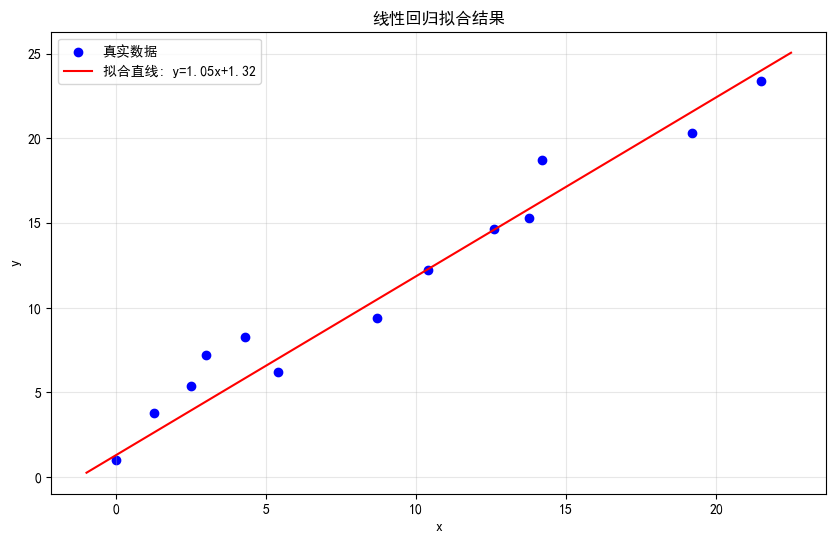

In [2]:
import matplotlib.pyplot as plt

#maplot报错———不支持中文字体，故添加如下
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

def forward(x, w, b):
    """前向传播(线性模型)：给定 x、w、b，返回预测值 y_hat"""
    return w * x + b

def loss(y_true, y_hat):
    """均方误差"""
    n = len(y_true)
    return (1 / n) * sum((t - h) ** 2 for t, h in zip(y_true, y_hat))

def gradients(X, y_true, y_hat, w, b):
    """返回两个梯度dw, db"""
    n = len(X)
    dw = -(2 / n) * sum((t-h) * x for x, t, h in zip(X, y_true, y_hat))
    db = -(2 / n) * sum((t-h) for t, h in zip(y_true, y_hat))
    return dw, db

X = [0, 1.25, 2.5, 3, 4.3, 5.4, 8.7, 10.4, 12.58, 13.75, 14.2, 19.2, 21.5]
y_true = [1, 3.8, 5.4, 7.2, 8.3, 6.2, 9.4, 12.2, 14.67, 15.28, 18.7, 20.3, 23.4]

lr_list = [0.001]
epochs_to_print = [1, 2, 3, 50, 100, 500, 1000]
total_epochs = 1000

for lr in lr_list:
    print(f"=== 学习率: {lr} ===")
    w, b = 0.0, 0.0
    for epoch in range(1, total_epochs + 1):
        y_hat = [forward(x, w, b) for x in X]
        current_loss = loss(y_true, y_hat)
        if epoch in epochs_to_print:
            print(f"Epoch {epoch}: w={w:.4f}, b={b:.4f}, loss={current_loss:.4f}")
        dw, db = gradients(X, y_true, y_hat, w, b)
        w -= lr * dw
        b -= lr * db
    print("-" * 50 + "\n")

##打印效果最好的值
final_w = w
final_b = b
print(f"训练结果：w = {final_w:.4f}, b = {final_b:.4f}")
print(f"拟合直线：y = {final_w:.4f}x + {final_b:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y_true, color='blue', label='真实数据')
x_range = [min(X)-1, max(X)+1]
y_fit = [w * x + b for x in x_range]
plt.plot(x_range, y_fit, 'r-', label=f'拟合直线: y={w:.2f}x+{b:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('线性回归拟合结果')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
